In [ ]:
#Clustering Technique: K-Means vs DBCAN

#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score,davies_bouldin_score

In [ ]:
#Load the dataset
data_url = "Mall_Customers.csv"
df = pd.read_csv(data_url)

In [ ]:
#Exploring the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Selecting features for clustering
features = df[['Annual Income (k$)','Spending Score (1-100)']]


In [ ]:
#Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

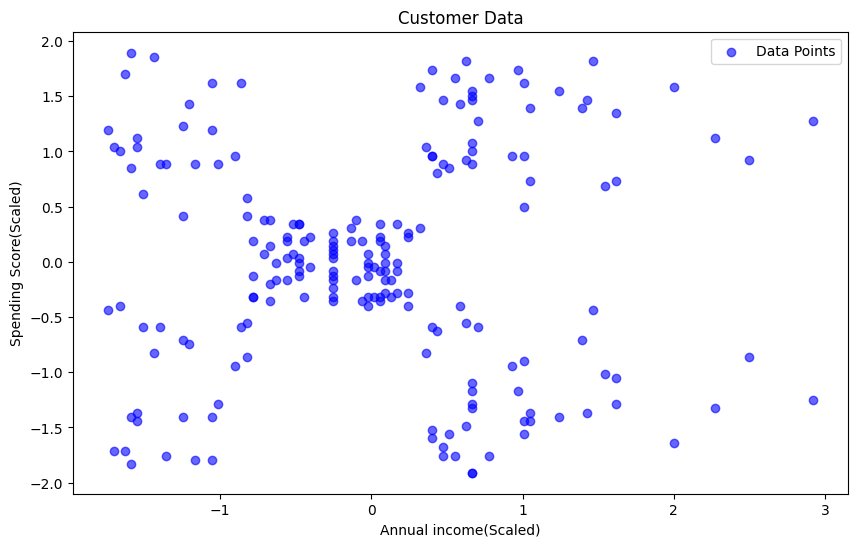

In [ ]:
#Plot the dataset
plt.figure(figsize=(10,6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c='blue', alpha=0.6, label='Data Points')
plt.title('Customer Data')
plt.xlabel('Annual income(Scaled)')
plt.ylabel('Spending Score(Scaled)')
plt.legend()
plt.show()


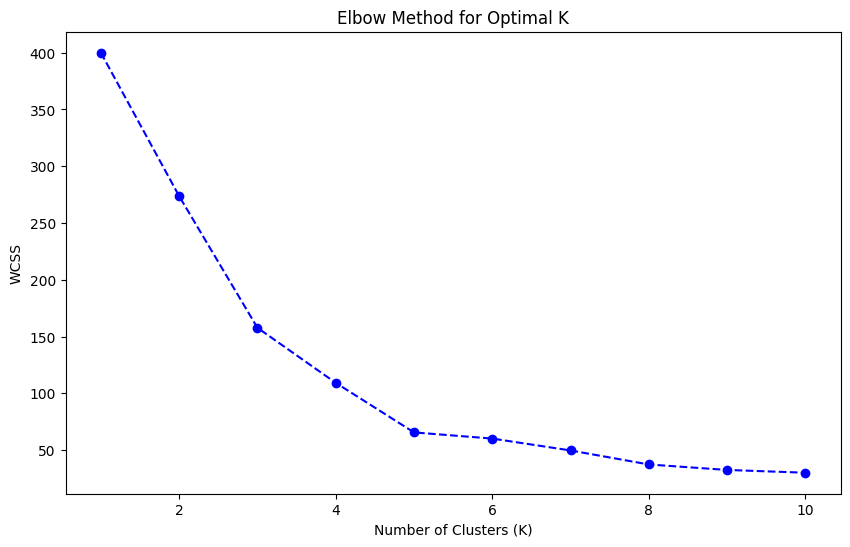

In [ ]:
#------ K-Means Clustering------

#Determine the optimal number clustering using the Elbow Method
wcss = []
K_range = range(1,11)
for K in K_range:
    kmeans = KMeans(n_clusters=K, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

#Plot the Elboew method
plt.figure(figsize=(10,6))
plt.plot(K_range, wcss, marker='o', linestyle='--', color ='blue')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Apply K-Means with optimal K (5 from elbow method)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

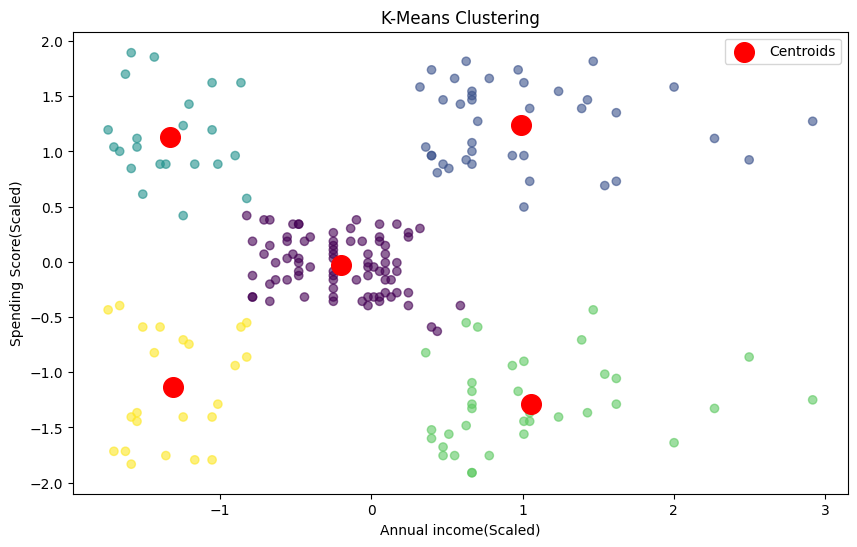

In [ ]:
#Visualize K-Means Clusters
plt.figure(figsize=(10,6))
colors = ['red', 'green', 'blue', 'yellow', 'purple']
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Annual income(Scaled)')
plt.ylabel('Spending Score(Scaled)')
plt.legend()
plt.show()


In [ ]:
#Evaluate the K-Means
silhouette_kmeans = silhouette_score(scaled_features, cluster_labels)
davies_bouldin_kmeans = davies_bouldin_score(scaled_features, cluster_labels)
print(f"Silhouette Score: {silhouette_kmeans:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin_kmeans:.4f}")


Silhouette Score: 0.5547
Davies-Bouldin Score: 0.5722


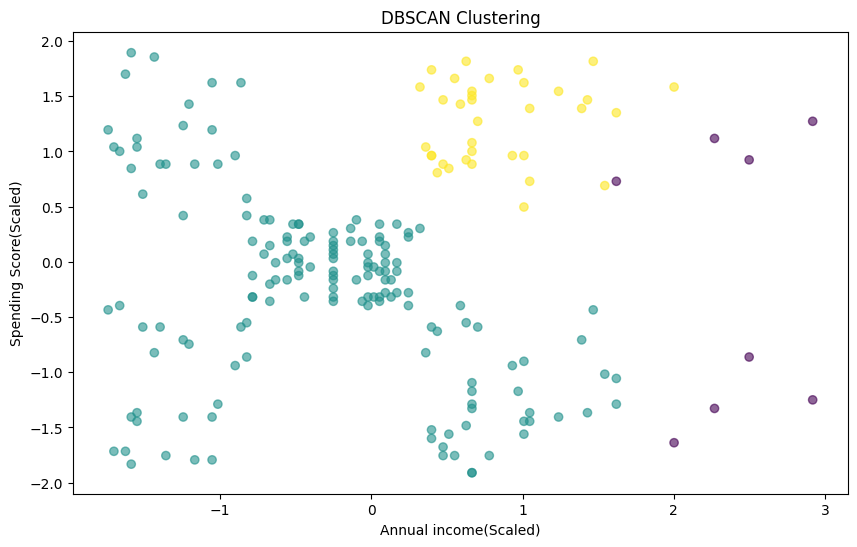

In [ ]:
#------------DBSCAN Clustering---------
#Apply DBSCAN with choden parameters (eps and min samples)

dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels_dbscan = dbscan.fit_predict(scaled_features)

#Visualize the DBSCAN Clusters
plt.figure(figsize=(10,6))
colors = ['red', 'green', 'blue', 'yellow', 'purple']
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=cluster_labels_dbscan, cmap='viridis', alpha=0.6)
plt.title('DBSCAN Clustering')
plt.xlabel('Annual income(Scaled)')
plt.ylabel('Spending Score(Scaled)')
plt.show()


In [ ]:
#Evaluate DBSCAN (ignoring noise with lable -1)
valid_labels = cluster_labels_dbscan[cluster_labels_dbscan != -1]
if len(valid_labels) > 0:
    silhouette_avg_dbscan = silhouette_score(scaled_features[cluster_labels_dbscan != -1],valid_labels)

    davies_bouldin_dbscan = davies_bouldin_score(scaled_features[cluster_labels_dbscan != -1],valid_labels)
    print(f"Silhouette Score (DBSCAN): {silhouette_avg_dbscan:.4f}")
    print(f"Davies-Bouldin Score (DBSCAN): {davies_bouldin_dbscan:.4f}")

else:
        print("No valid data points for DBSCAN.")

#-----Comparision---------

Comparision_table = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Davies-Bouldin Index'],
    'K-Means': [silhouette_kmeans, davies_bouldin_kmeans],
    'DBSCAN': [silhouette_avg_dbscan if len(valid_labels) > 0 else None,
               davies_bouldin_dbscan if len(valid_labels) > 0 else None]

})
print("\nComparision of Clustering Techniques:")
print(Comparision_table)


Silhouette Score (DBSCAN): 0.3876
Davies-Bouldin Score (DBSCAN): 0.7889

Comparision of Clustering Techniques:
                 Metric   K-Means    DBSCAN
0      Silhouette Score  0.554657  0.387558
1  Davies-Bouldin Index  0.572236  0.788864
